In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rcParams
#from scipy.stats import binned_statistic
import random
from astropy.units import cm
%matplotlib inline

In [2]:
#import data
data = pd.read_csv("./novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
provincial_data = pd.read_csv("covid_19_South_Africa_Provicial.csv")
province = pd.read_csv("covid_19_South_Africa_Provicial_cumulative1.csv")
deaths = pd.read_csv("covid_19_data.csv")
age_gender = pd.read_csv("covid_19_South_Africa_Age_Sex.csv")

In [3]:
#set-up the plots size, font and background colours
rcParams['font.family'] = 'Arial Rounded MT Bold'
rcParams['font.size'] = '16'
rcParams['text.color'] = 'darkslategrey'
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'ghostwhite'
rcParams['figure.figsize'] = (16,10)

In [4]:
#select South Africa in the data for analysis and slice for March days
SA_data = data[data['Country/Region'] == 'South Africa']
daily = np.array(SA_data[SA_data.columns[43:]])
dates = SA_data.columns[43:]
daily_infections=[]
for i in daily:
    for j in i:
        daily_infections.append(j)

xx=np.where(daily_infections==daily_infections[-1])
for i in xx:
    for j in i:
        xy=j-0.5

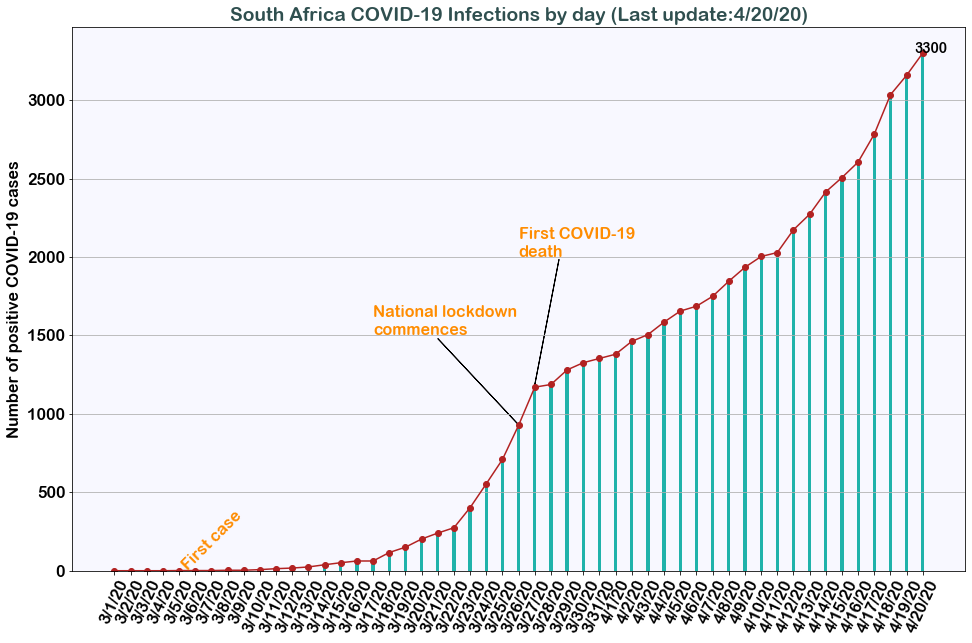

In [5]:
#cumulative data plot
plt.title('South Africa COVID-19 Infections by day (Last update:{})'.format(dates[-1]))
plt.plot(dates, daily_infections,'r-o',color='firebrick') #line plot
plt.bar(dates, daily_infections, width=0.2,color='lightseagreen')
plt.text(4,5,'First case',color='darkorange',fontsize=16,rotation=45)
plt.xticks(rotation=65)
plt.arrow(25, 930, -5, 550)
plt.text(16,1500,'National lockdown\ncommences',color='darkorange',fontsize=16)
plt.arrow(26, 1185, 1.5, 800)
plt.text(25,2000,'First COVID-19\ndeath',color='darkorange',fontsize=16)
plt.text(xy,daily_infections[-1],'{}'.format(daily_infections[-1]),color='black',fontsize=14)
plt.ylabel('Number of positive COVID-19 cases')
plt.grid(axis='y')
plt.show()

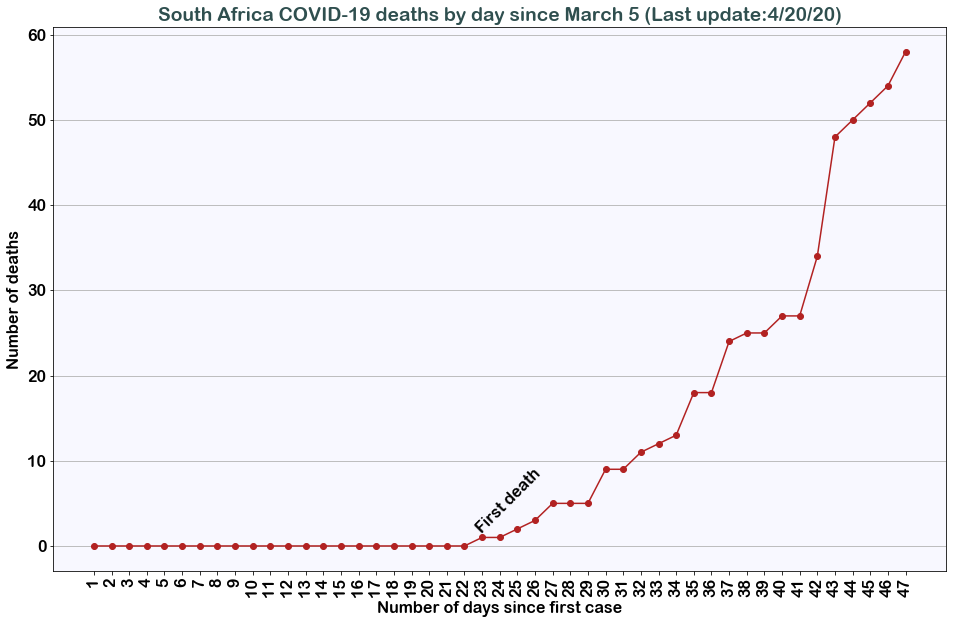

In [6]:
SA_deaths = deaths[deaths['Country/Region']=='South Africa']
x = np.arange(1,len(SA_deaths['Deaths'])+1,1)
#cumulative data plot
plt.title('South Africa COVID-19 deaths by day since March 5 (Last update:{})'.format(dates[-1]))
plt.plot(x, SA_deaths['Deaths'],'r-o',color='firebrick') #line plot
plt.text(22.5,1.5,'First death',color='black',fontsize=16,rotation=45)
plt.xticks(range(1,len(SA_deaths['Deaths'])+1), rotation=90)
plt.xlabel("Number of days since first case")
plt.ylabel("Number of deaths")
plt.grid(axis='y')
plt.show()

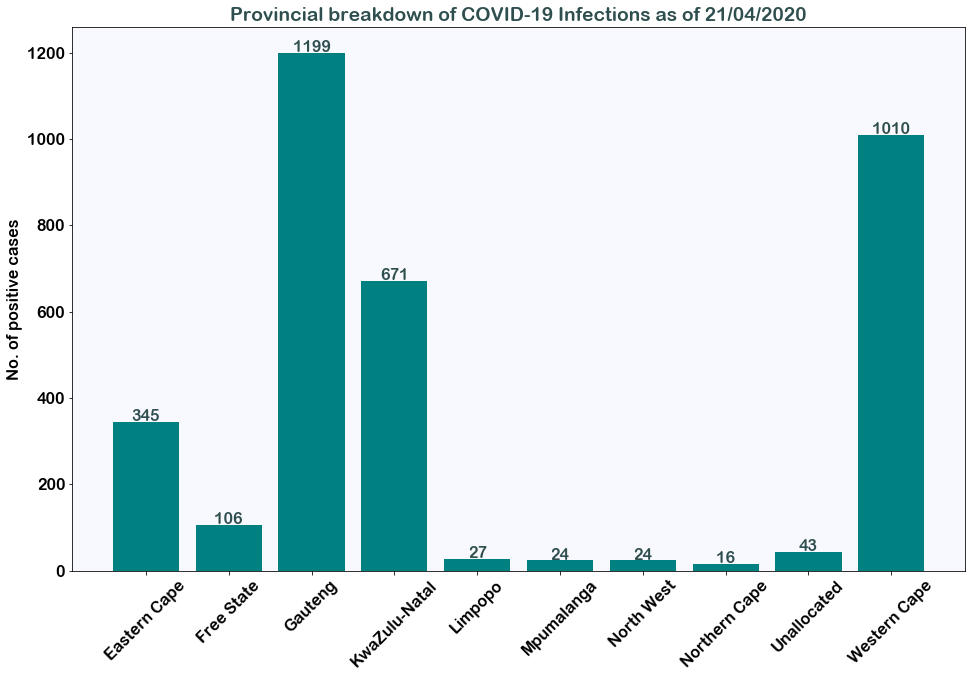

In [7]:
#provincial infections data plots
provincial=province.sort_values(by=['Province'])
provinces = np.asarray(provincial['Province'])
infections = np.array(provincial[provincial.columns[-1]])
plt.title('Provincial breakdown of COVID-19 Infections as of {}'.format(province.columns[-1]))
plt.bar(provincial['Province'],infections,color='teal')
plt.ylabel('No. of positive cases')
for j,infections in enumerate(infections):
    plt.text(j,infections+2, infections,horizontalalignment='center')
plt.xticks(rotation=45)
plt.show()

#Provincial data piec chart
provinces = np.asarray(provincial['Province'])
explode = [0,0,0,0,0.5,0.6,0.7,0.8,1,0]
#plt.title("Infections by province in pie")
plt.pie(provincial[provincial.columns[-1]], explode = explode, labels=provinces, shadow=True, startangle=-60, 
        rotatelabels=True, autopct='%1.1f%%', textprops=dict(color="black"))
plt.show()

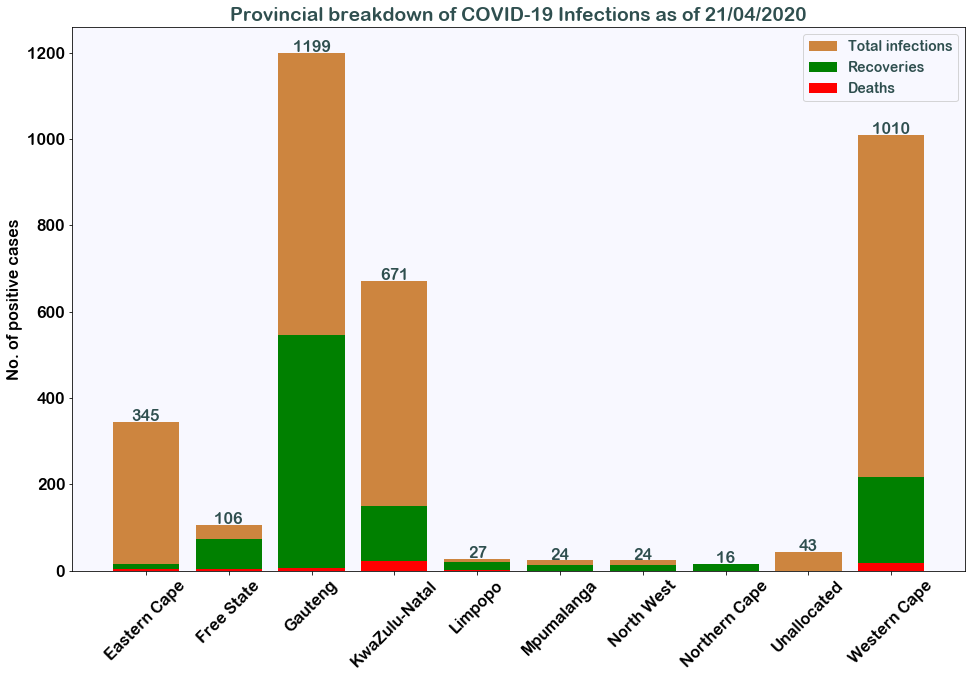

In [9]:
#provincial infections data plots
infections = provincial[provincial.columns[-1]]
plt.title('Provincial breakdown of COVID-19 Infections as of {}'.format(province.columns[-1]))
b1=plt.bar(provincial_data['Province'],infections,color='peru', label='Total infections')
b2=plt.bar(provincial_data['Province'],provincial_data['Recoveries'],color='green', label='Recoveries')
b3=plt.bar(provincial_data['Province'],provincial_data['Deaths'],color='red', label='Deaths')
plt.legend(loc='best', fontsize=14)
plt.ylabel('No. of positive cases')
for j,infections in enumerate(infections):
    plt.text(j,infections+2, infections,horizontalalignment='center')
plt.xticks(rotation=45)
plt.show()

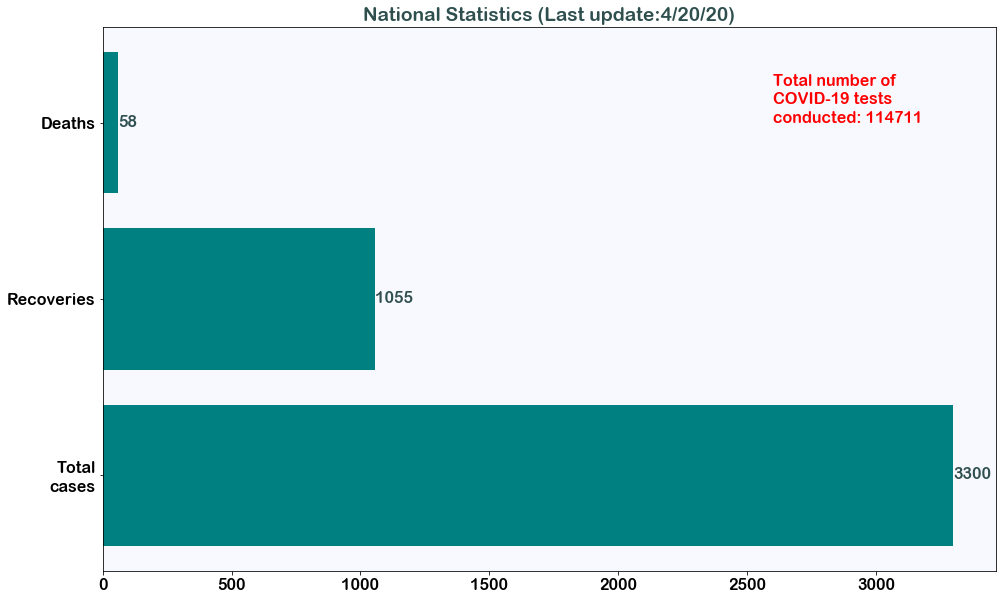

In [10]:
#national key statistics
confirmed = np.asarray(SA_deaths['Confirmed'])
recovered = np.asarray(SA_deaths['Recovered'])
deaths = np.asarray(SA_deaths['Deaths'])
data1 = ['Total\ncases','Recoveries','Deaths']
dat1=[int('{:.0f}'.format(confirmed[-1])),int('{:.0f}'.format(recovered[-1])),int('{:.0f}'.format(deaths[-1]))]

plt.title('National Statistics (Last update:{})'.format(dates[-1]))
plt.barh(data1, dat1,color='teal')
for k,dat1 in enumerate(dat1):
    plt.text(dat1+2,k,dat1,verticalalignment='center')
plt.text(2600, 2,'Total number of\nCOVID-19 tests\nconducted: 114711',color='red',fontsize=16)
plt.show()

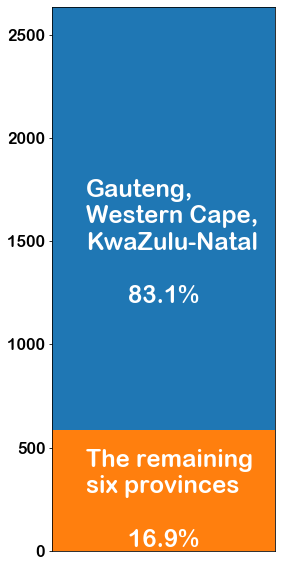

In [12]:
high = []
low = []
for province in provincial[provincial.columns[-1]]:
    if province >= 617:
        high.append(province)
    elif province < 617:
        low.append(province)

high_infections = np.sum(high)
low_infections = np.sum(low)

fig = plt.figure(figsize=(4,10))
b1=plt.bar(0.05,high_infections, width=0.1)
b2=plt.bar(0.05,low_infections, width=0.1)
plt.text(0.015,1200, "Gauteng,\nWestern Cape,\nKwaZulu-Natal\n\n       {:.1f}%".format(sum(high)*100/sum(provincial[provincial.columns[-1]])),
         color='white', fontsize=24)
plt.text(0.015,20, "The remaining\nsix provinces\n\n       {:.1f}%".format(sum(low)*100/sum(provincial[provincial.columns[-1]])),
         color='white', fontsize=24)
plt.xlim(0,0.1)
plt.ylim(0,2633)
plt.xticks([])
plt.show()

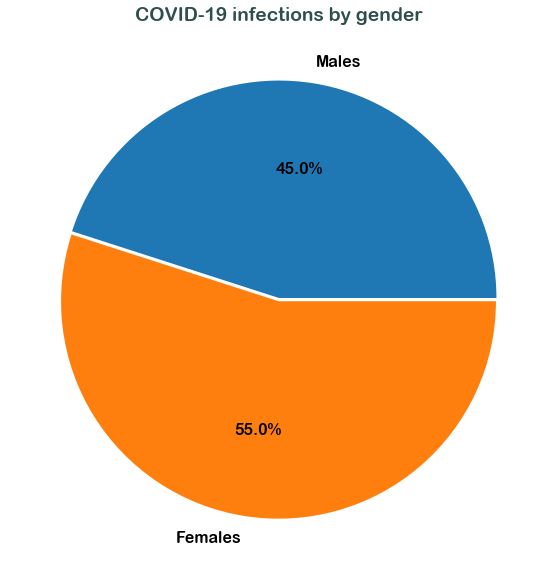

In [13]:
male_infections = sum(age_gender['Male'])
female_infections = sum(age_gender['Female'])
plt.title("COVID-19 infections by gender")
labels = ['Males', 'Females']
gender_inf = [sum(age_gender['Male']), sum(age_gender['Female'])]

plt.pie(gender_inf, labels=labels, autopct='%1.1f%%', explode=[0,0.015], textprops=dict(color="black"))
plt.show()

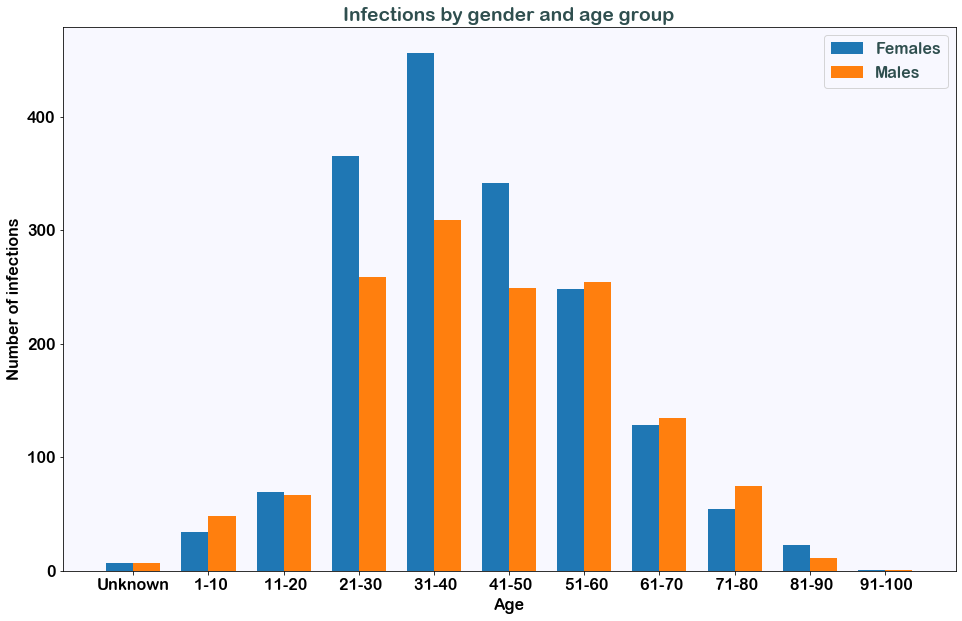

In [14]:
plt.title("Infections by gender and age group")
p1 = plt.bar(np.arange(0,11,1)-0.18,age_gender['Female'],width=0.36, label='Females')
p2 = plt.bar(np.arange(0,11,1)+0.18,age_gender['Male'],width=0.36, label='Males')
p3 = plt.bar(age_gender['Age group'], np.zeros(11))
plt.xlabel("Age")
plt.ylabel("Number of infections")
plt.legend(loc='best')
plt.show()